# Video timestamp retrieval
**Purpose**
    The purpose of this notebook is to figure out how to take a frame from an AVI video and use opencv to read the text at the bottom of the frame, and save a file with the info (timestamp, temperature)
    
**Outline**
1. Import a frame of the file
2. Read text using opencv
3. Parse text 
4. Save out txt file with the same name as the video.txt

5. Then make this into a function that can run on a file
6. Use it on a folder of AVI files

# Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse, time, os, sys, cv2, pytesseract, re
from imutils.object_detection import non_max_suppression

In [10]:
%load_ext autoreload
%autoreload 2
sys.path.append("../src")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import utils

# User inputs

In [7]:
# LATER CHANGE TO folder of videos
folder_of_videos_path='/Users/emilydennis/Desktop/fieldwork_videos/'

# video
#video_path='/Users/emilydennis/Desktop/fieldwork_videos/05292021_09B_11.AVI'
df = pd.DataFrame(columns=['video','date','time','C','F'])


# Define functions

In [8]:
#from utils import check_for_df, get_video_descriptions, video_to_text, text_parsing, get_temp, num_from_text

# Use of fxs

In [9]:
df = utils.get_video_descriptions(df, folder_of_videos_path)

this is a folder


NameError: name 'os' is not defined

In [14]:
df

,video,date,time,C,F


# Process

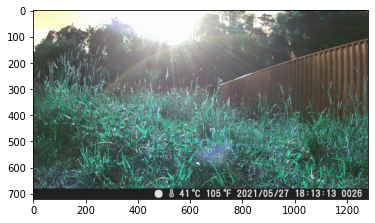

In [21]:
video_path="/Users/emilydennis/Desktop/fieldwork_videos/05292021_10B_26.AVI"

img = cv2.VideoCapture(video_path)
ret, frame = img.read()
plt.figure()
plt.imshow(frame)

In [22]:
f2 = frame.copy()
np.shape(f2)

(720, 1280, 3)

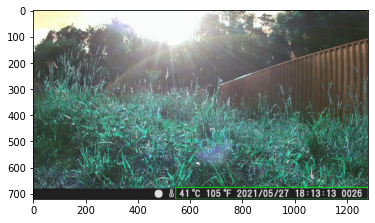

In [23]:
rect = cv2.rectangle(f2, (545,675), (1280,720), (0, 255, 0), 2)
plt.imshow(rect)

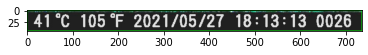

In [24]:
# crop image
cropped=f2[675:720,545:1280]

#plot
plt.imshow(cropped)

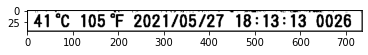

In [25]:
# make grayscale
gray = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
# threshold and binarize
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
# plot
plt.imshow(thresh,cmap='gray')

In [26]:
# get text from image
text = pytesseract.image_to_string(thresh)
textlist = text.split()
print(textlist)
data={}
data['video']=video_path.split('/')[-1]

for substr_index in np.arange(len(textlist)):
    substr=textlist[substr_index]
    print(substr)
    if "F" in substr:
        if substr.split('°')[0].isnumeric():
            data['F']=split
        else:
            if textlist[substr_index-1].isnumeric():
                data['F']= textlist[substr_index-1]


['41°C', '105', '°F', '2021/05/27', '18:13:13', '0026']
41°C
105
°F
2021/05/27
18:13:13
0026


In [27]:
# parse string into a data structure
data={}
data['video']=video_path.split('/')[-1]

for substr_index in np.arange(len(textlist)):
    substr=textlist[substr_index]
    print(substr)
    if "F" in substr:
        data['F']=textlist[get_temp(substr_index,substr)]
    elif "C" in substr:
        data['C']=textlist[get_temp(substr_index,substr)]
    elif "2021" in substr:
        data['date']=substr.split('/')[0]+substr.split('/')[1]+substr.split('/')[2]
    elif ":" in substr:
        data['time']=substr.split(':')[0]+substr.split(':')[1]+substr.split(':')[2]
        
# sometimes the first degree measure, Celcius, gets missed, but we can calculate it from F
if 'C' not in data:
    data['C']=str(round((int(data['F'])-32)*(5/9)))

df.append(data,ignore_index=True)

41°C


TypeError: get_temp() missing 1 required positional argument: 'textlist'

# todo next: 
make into script, run on cluster